#  Functions of one variable: Derivative and optimization : Derivatives

## 1️⃣ Experiment 01 — Visualizing a Function and Its Derivative

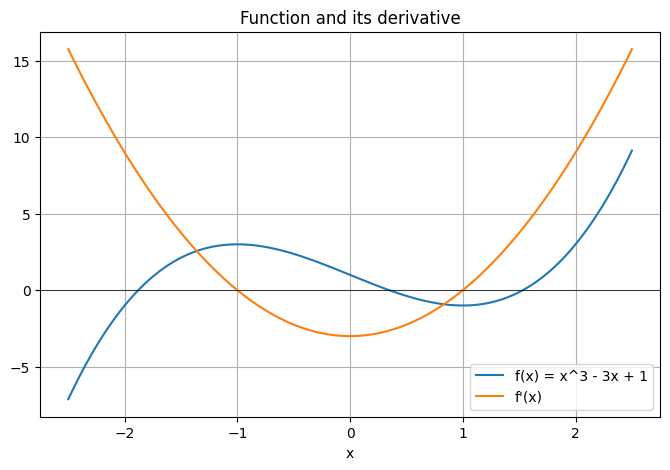

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Function
def f(x):
  return x**3 - 3*x + 1


def df(x):
  return 3*x**2 - 3


x = np.linspace(-2.5, 2.5, 400)
plt.figure(figsize=(8,5))
plt.plot(x, f(x), label='f(x) = x^3 - 3x + 1')
plt.plot(x, df(x), label="f'(x)")
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('Function and its derivative')
plt.xlabel('x')
plt.grid(True)
plt.show()

### Purpose

This experiment visualizes a function and its derivative on the same plot to illustrate how derivatives describe the slope of the function at any point.

### Function Definition

We define a cubic function:

f(x) = x^3 - 3x + 1

Its analytical derivative is:

df(x) = 3x^2 - 3

### What the Plot Shows

- The blue curve is the original function.

- The orange curve is the derivative, which shows how steep the function is at every point.

- Points where the derivative crosses zero correspond to critical points (possible minima or maxima).

### Key Concept

The derivative tells us the slope of the tangent line. When the derivative is:

- Positive → the function is increasing.

- Negative → the function is decreasing.

- Zero → the function has a flat slope (critical point).



---
## 2️⃣ Experiment 02 — Symbolic Differentiation Using SymPy

In [8]:
from sympy import symbols, diff, sin, cos, exp, ln


x = symbols('x')
exprs = [x**2, 1/x, exp(x), ln(x), sin(x)*cos(x)]
for e in exprs:
   print('f(x)=', e)
   print("f'(x)=", diff(e, x))
   print('---')


# Chain rule example
y = exp(x**2)
print('f(x)=', y)
print("f'(x)=", diff(y, x))

f(x)= x**2
f'(x)= 2*x
---
f(x)= 1/x
f'(x)= -1/x**2
---
f(x)= exp(x)
f'(x)= exp(x)
---
f(x)= log(x)
f'(x)= 1/x
---
f(x)= sin(x)*cos(x)
f'(x)= -sin(x)**2 + cos(x)**2
---
f(x)= exp(x**2)
f'(x)= 2*x*exp(x**2)


### Purpose

This experiment uses sympy for symbolic differentiation—an essential tool for verifying derivatives analytically.

### What It Demonstrates

1. Differentiating common expressions:

   - Polynomials

   - Rational functions

   - Exponential functions

   - Logarithms

   - Products of trigonometric functions

2. A chain rule example:

y = exp(x**2)

Derivative:

y' = 2x * exp(x**2)

SymPy computes this automatically.

### Why Symbolic Math Matters

Symbolic differentiation is:

- Exact (in contrast to numerical methods)

- Useful for validating analytic forms

- Essential in automatic differentiation systems used in ML frameworks



---


## 3️⃣ Experiment 03 — Numerical Derivatives and Gradient Descent Optimization



In [6]:
import numpy as np


# Numerical derivative (central difference)
def numeric_derivative(f, x, h=1e-6):
    return (f(x+h) - f(x-h)) / (2*h)


# Function: squared loss with single parameter theta
# Imagine data: y = 2x + noise
X = np.linspace(-1, 1, 50)
y = 2*X + 0.1*np.random.randn(len(X))


# Model: y_hat = theta * x (no bias)
# Loss(theta) = mean((y - theta*x)**2)


def loss(theta):
   return np.mean((y - theta*X)**2)


def dloss(theta):
   return numeric_derivative(loss, theta)


# Analytic derivative: derivative of mean((y - theta x)^2) w.r.t theta
def dloss_analytic(theta):
   return np.mean(-2*X*(y - theta*X))


# Compare numeric and analytic derivatives
theta0 = 0.0
print('numeric dloss:', dloss(theta0))
print('analytic dloss:', dloss_analytic(theta0))


# Simple gradient descent to find theta
theta = 0.0
lr = 0.1
for i in range(200):
  g = dloss_analytic(theta)
  theta -= lr * g


print('Estimated theta (GD):', theta)
# True slope by least squares (closed form)
theta_true = np.sum(X*y)/np.sum(X*X)
print('Closed-form theta:', theta_true)

numeric dloss: -1.3828696087125891
analytic dloss: -1.3828696086064087
Estimated theta (GD): 1.992958011366253
Closed-form theta: 1.992959141815119


### Purpose

This experiment explores numerical differentiation and optimization in the context of a simple regression problem.

1. Numerical Derivative

We compute the numerical derivative using the central difference method:

df(x) ≈ (f(x+h) - f(x-h)) / (2h)

This provides an approximation of the derivative.

2. Regression Setup

We simulate data from:

y = 2x + noise

We want to estimate the unknown slope parameter theta by minimizing the mean squared error:

Loss(theta) = mean((y - theta * x)^2)

3. Comparing Derivatives

We compute:

- A numeric derivative using central difference

- An analytic derivative computed directly from the formula

This comparison validates the numerical method.

4. Gradient Descent Optimization

We perform gradient descent:

theta = theta - lr * dloss(theta)

After several iterations, gradient descent produces an estimate of the slope.

We compare it with the closed-form solution:

theta_true = $$sum(X*y) / sum(X*X)$$

The two values should match closely.